## 1. Breath alcohol tests in Ames, Iowa, USA
<p>Ames, Iowa, USA is the home of Iowa State University, a land grant university with over 36,000 students. By comparison, the city of Ames, Iowa, itself only has about 65,000 residents. As with any other college town, Ames has had its fair share of alcohol-related incidents. (For example, Google 'VEISHEA riots 2014'.) We will take a look at some breath alcohol test data from Ames that is published by the State of Iowa.</p>
<p><img style="width:500px" src="https://s3.amazonaws.com/assets.datacamp.com/production/project_208/img/usa.jpg"> </p>
<p>The data file 'breath_alcohol_ames.csv' contains 1,556 readings from breath alcohol tests administered by the Ames and Iowa State University Police Departments from January 2013 to December 2017. The columns in this data set are year, month, day, hour, location, gender, Res1, Res2.</p>

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('breath_alcohol_ames.csv')

In [4]:
data.head(20)

,year,month,day,hour,location,gender,Res1,Res2
0,2017,12,17,1,Ames PD,M,0.046,0.046
1,2017,12,14,3,ISU PD,F,0.121,0.120
2,2017,12,10,5,ISU PD,F,0.068,0.067
3,2017,12,10,3,ISU PD,F,0.077,0.077
4,2017,12,9,2,ISU PD,M,0.085,0.084
5,2017,12,9,1,Ames PD,M,0.160,0.161
6,2017,12,7,3,Ames PD,M,0.131,0.131
7,2017,12,4,1,ISU PD,M,0.000,0.000
8,2017,12,3,1,Ames PD,M,0.091,0.090
9,2017,12,3,0,Ames PD,M,0.095,0.095


In [5]:
data.isnull().sum() # checking for nulls

year         0
month        0
day          0
hour         0
location     0
gender      29
Res1         0
Res2         0
dtype: int64

In [6]:
data['gender'].value_counts()

M    1102
F     425
Name: gender, dtype: int64

In [8]:
# replacing missing gender values with male
data.fillna('M', inplace=True)

In [9]:
data.isnull().sum()

year        0
month       0
day         0
hour        0
location    0
gender      0
Res1        0
Res2        0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 8 columns):
year        1556 non-null int64
month       1556 non-null int64
day         1556 non-null int64
hour        1556 non-null int64
location    1556 non-null object
gender      1556 non-null object
Res1        1556 non-null float64
Res2        1556 non-null float64
dtypes: float64(2), int64(4), object(2)
memory usage: 97.3+ KB


In [11]:
data['year'].value_counts()

2013    397
2014    344
2015    286
2016    269
2017    260
Name: year, dtype: int64

In [13]:
data['month'].value_counts()

8     167
4     159
9     146
3     145
1     145
10    135
5     132
2     117
6     112
7     104
11    100
12     94
Name: month, dtype: int64

In [15]:
data['day'].nunique()

31

In [16]:
data['hour'].unique()

array([ 1,  3,  5,  2,  0, 18, 19,  4, 21, 15, 12, 22, 10,  7, 17, 20, 13,
       23,  9, 16, 11,  6, 14,  8], dtype=int64)

In [17]:
data['location'].value_counts()

ISU PD     940
Ames PD    616
Name: location, dtype: int64

In [18]:
data['Res1'].nunique()

247

In [19]:
data['Res2'].nunique()

252

Data Desciption

Categorical cols - Year, month, day, hour, location and gender

Numerical cols - Res1, Res2

Year, month, day and hour - time and date of when the breath analyzer test was conducted

Location - Which Police Dept. had conducted the test

Gender - Gender of the person accused

Res1, Res2 - Results of 2 consecutive breath analyzer test 

In [21]:
data.describe() # mean and median of Res1 are approximately equal and same situation for res2

,year,month,day,hour,Res1,Res2
count,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000,1556.000000
mean,2014.775707,6.258355,15.872108,5.122751,0.117526,0.117085
std,1.426150,3.363903,8.676373,6.460941,0.067389,0.067183
min,2013.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2013.000000,3.000000,8.000000,2.000000,0.078000,0.078750
50%,2015.000000,6.000000,16.000000,3.000000,0.123000,0.123000
75%,2016.000000,9.000000,24.000000,4.000000,0.163250,0.163000
max,2017.000000,12.000000,31.000000,23.000000,0.352000,0.351000


In [28]:
data.head(20)

,year,month,day,hour,location,gender,Res1,Res2
0,2017,12,17,1,Ames PD,M,0.046,0.046
1,2017,12,14,3,ISU PD,F,0.121,0.120
2,2017,12,10,5,ISU PD,F,0.068,0.067
3,2017,12,10,3,ISU PD,F,0.077,0.077
4,2017,12,9,2,ISU PD,M,0.085,0.084
5,2017,12,9,1,Ames PD,M,0.160,0.161
6,2017,12,7,3,Ames PD,M,0.131,0.131
7,2017,12,4,1,ISU PD,M,0.000,0.000
8,2017,12,3,1,Ames PD,M,0.091,0.090
9,2017,12,3,0,Ames PD,M,0.095,0.095


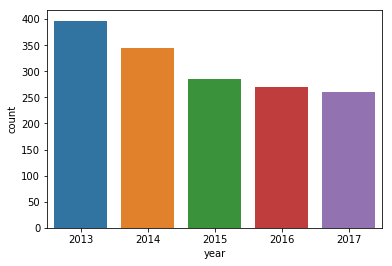

In [29]:
sns.countplot(data['year'])
#no. of breath analyzer tests have decresed over the years

In [40]:
# let us the calculate the % decrease in the no. of breath analyzer tests YoY
yoy= pd.DataFrame(data.groupby('year').count()['gender'])
yoy.rename({'gender':'no. of tests'},axis=1, inplace=True)
yoy

,no. of tests
year,
2013,397
2014,344
2015,286
2016,269
2017,260


In [53]:
# percentage decrease in no. of testsyear over year
pct=[]
l=0
for i in range(0,len(yoy)):
    if i==0:
        pct.append(0)
    else:
        l=yoy.iloc[i-1,0]
        pct.append(((l-yoy.iloc[i,0])/l)*100)
yoy['Pct_Dec']=pct
yoy

,no. of tests,Pct_Dec
year,,
2013,397,0.000000
2014,344,13.350126
2015,286,16.860465
2016,269,5.944056
2017,260,3.345725


In [50]:
(yoy.iloc[1,0]-yoy.iloc[0,0])/yoy.iloc[0,0] * 100

-13.350125944584383

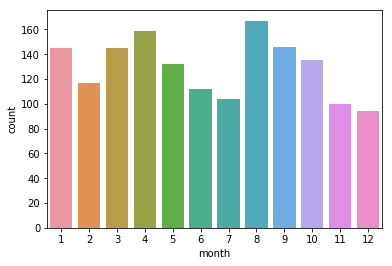

In [55]:
# lets look at the no. of tests on a monthly basis
sns.countplot(data['month'])
# as you can see the April and August has the highest no. 
# This is because these are the durations right before colleges resume classes after a break

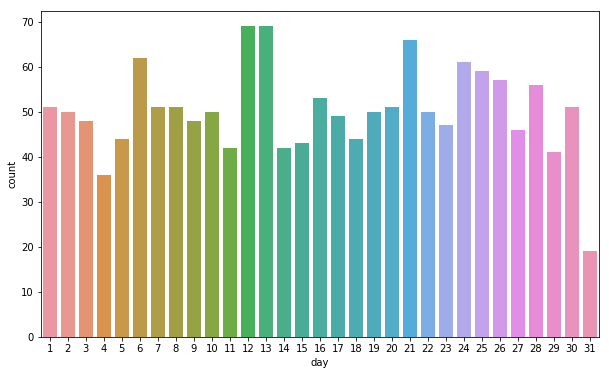

In [57]:
# lets look at the no. of tests on a day to day basis
plt.figure(figsize=(10,6))
sns.countplot(data['day'])

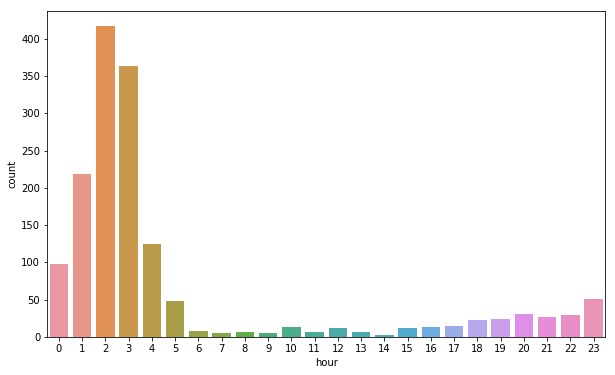

In [59]:
# lets look at time on a day when test are most
plt.figure(figsize=(10,6))
sns.countplot(data['hour'])
# 2 AM is the max. This is right after students party and begin to go back to their homes and dorms

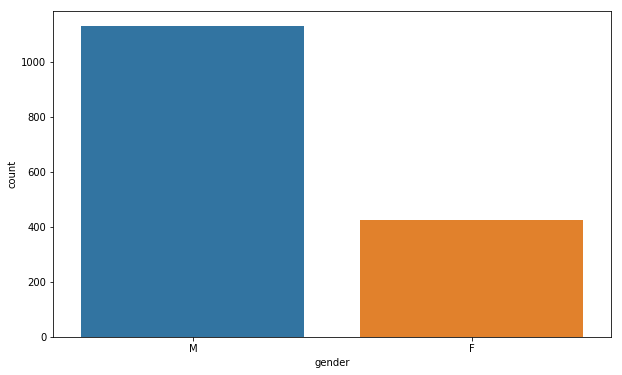

In [68]:
# lets look at how many males and females were tested
plt.figure(figsize=(10,6))
sns.countplot(data['gender'])

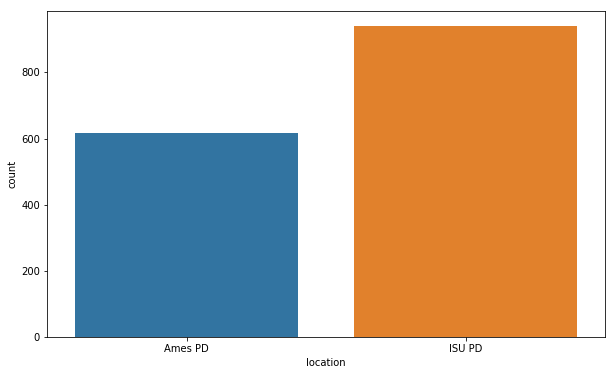

In [69]:
# lets look at which police dept. conducted the most number of tests
plt.figure(figsize=(10,6))
sns.countplot(data['location'])
# ISU stands for Iowa State Univ.

In [66]:
# combining both res1 and res2 into 1 column - MeanRes
data['MeanRes'] = list(map(lambda x,y: (x+y)/2, data['Res1'],data['Res2']))    

In [67]:
data.head(20)

,year,month,day,hour,location,gender,Res1,Res2,MeanRes
0,2017,12,17,1,Ames PD,M,0.046,0.046,0.0460
1,2017,12,14,3,ISU PD,F,0.121,0.120,0.1205
2,2017,12,10,5,ISU PD,F,0.068,0.067,0.0675
3,2017,12,10,3,ISU PD,F,0.077,0.077,0.0770
4,2017,12,9,2,ISU PD,M,0.085,0.084,0.0845
5,2017,12,9,1,Ames PD,M,0.160,0.161,0.1605
6,2017,12,7,3,Ames PD,M,0.131,0.131,0.1310
7,2017,12,4,1,ISU PD,M,0.000,0.000,0.0000
8,2017,12,3,1,Ames PD,M,0.091,0.090,0.0905
9,2017,12,3,0,Ames PD,M,0.095,0.095,0.0950


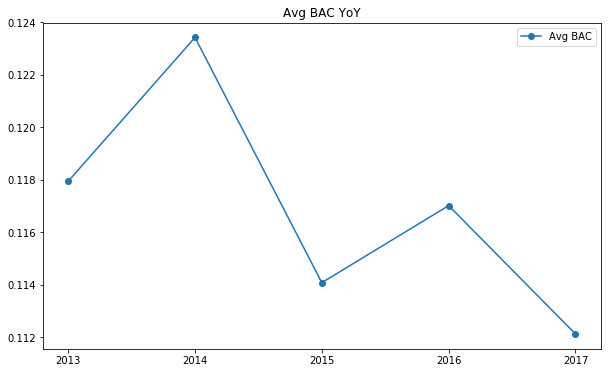

In [73]:
# lets see if the average blood alcohol consentration (BAC) which is measured by MeanRes increases or decreases YoY
plt.figure(figsize=(10,6))
z=data['MeanRes'].groupby(data['year']).mean()
plt.plot(z.index,z.values,marker='o',label='Avg BAC')
plt.xticks(z.index)
plt.title('Avg BAC YoY')
plt.legend()

### As you can see the max Avg BAC is during 2014. This is when the VEISHEA riots had occured

### This is interesting because the number of tests had decreased by 13% but the average BAC value increased

### Based on this we can say that the alcohol consumption was the highest in 2014

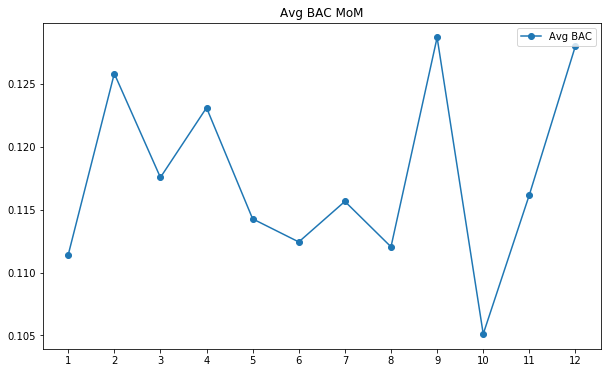

In [74]:
# lets see if the average blood alcohol consentration (BAC) which is measured by MeanRes increases or decreases MoM
plt.figure(figsize=(10,6))
z=data['MeanRes'].groupby(data['month']).mean()
plt.plot(z.index,z.values,marker='o',label='Avg BAC')
plt.xticks(z.index)
plt.title('Avg BAC MoM')
plt.legend()

#### Max number of tests were conducted in August but on the contrary, August has one of the lowest avg BAC. Sept. has the highest Avg. BAC of all months.

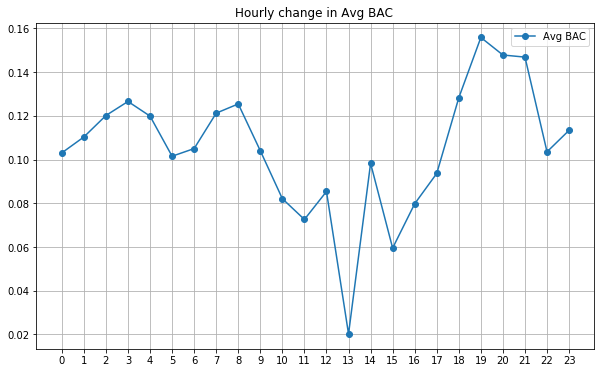

In [87]:
# lets see if the average blood alcohol consentration (BAC) which is measured by MeanRes increases or decreases 
#on an hourly basis
plt.figure(figsize=(10,6))
z=data['MeanRes'].groupby(data['hour']).mean()
plt.plot(z.index,z.values,marker='o',label='Avg BAC')
plt.grid()
plt.xticks(z.index)
plt.title('Hourly change in Avg BAC ')
plt.legend()

#### The maximum number of tests were done during 2 AM in the morning but the highest avg BAC was found to be around 7 PM.

#### Lowest avg BAC is during 1 PM probably because students are attending classes.

#### This can prove useful and police officers can start testing aroud 7 pm to catch more people who are driving under the influence of alcohol

<Figure size 720x432 with 0 Axes>

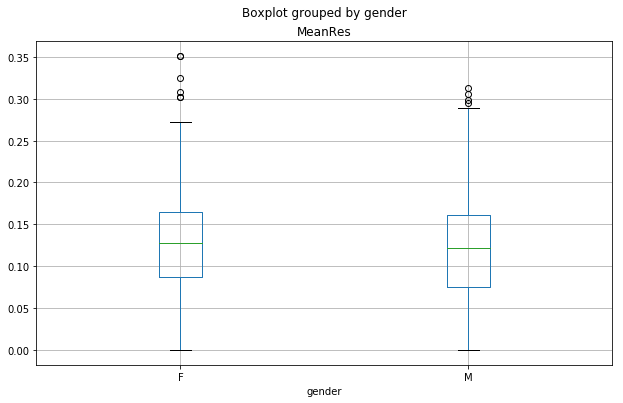

In [88]:
# lets see the average blood alcohol consentration (BAC) for male and female
plt.figure(figsize=(10,6))
data.boxplot('MeanRes',by='gender', figsize=(10,6))

#### The general assumption is that males drink more than 

#### Looking at the boxplot we can say that both genders consume equal amounts of alcohol

#### People having BAC more than 0.08 can be charged with a DUI case (Driving Under Influence). So let's create a new categorical column called dui which will say yes if MeanRes > 0.08 else no.

In [90]:
def dui(x):
    if x > 0.08:
        return 'yes'
    else:
        return 'no'

In [91]:
data['dui'] = data['MeanRes'].apply(dui)
data['dui'].value_counts()

yes    1159
no      397
Name: dui, dtype: int64

In [93]:
# let's have a look at what % of total records would have been a DUI case
pct_dui = ( len(data[data['dui'] == 'yes'])/len(data) ) * 100
print('Total % of DUI cases are : {}%'.format(round(pct_dui,2)))

Total % of DUI cases are : 74.49%


#### A whopping 74% of overall cases from Ames, Iowa between 2013-17 would be DUI cases.

## Final Conclusions

1. No. of breath analyzer tests have decresed over the years. Biggest decrease was 16.8% from 2014 to 2015.

2. April and August have the highest no. breath analyzer tests.

3. 2 AM has the highest no. breath analyzer tests.

4. Males were tested more number of times and ISU PD has conducted more number of tests compared to Ames PD.

5. Even though the number of tests have shown a gradual decrease from 2013-17, alcohol consumption was the highest in 2014.
   This coincides with the VEISHEA riots in 2014 which happened because people got heavily intoxicated.

6. Max number of tests were conducted in August but on the contrary, August has one of the lowest alcohol consumptions in      terms of average BAC. September has the highest Avg. BAC of all months.

7. The maximum number of tests were done during 2 AM in the morning but the highest avg bac was found to be around 7 PM.

8. Lowest avg BAC was found around 1 PM when students were probably in college attending classes.
    
9. The general assumption is that males drink more than females. Looking at the boxplot we can say that both genders          consume equal amounts of alcohol in terms of avg. BAC.

10. A whopping 74% of overall cases from Ames, Iowa between 2013-17 would be DUI cases.